In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
import warnings

def warn(*args, **kwargs):
    pass

warnings.warn = warn

# Master Data

In [4]:
master = pd.read_csv("Master Data.csv", delimiter=";", decimal=",")
master.head()

,Material Code,MAT_GROUP_DESC,BASIC_UNITS,Price,Min,Max
0,572,Bearings & housing,PC,10.148550,1.0,2.0
1,312,Bearings & housing,PC,38.280000,1.0,2.0
2,1526,Batteries,PC,0.318874,10.0,30.0
3,2207,Joining / welding materials,PC,0.024116,60.0,120.0
4,467,Joining / welding materials,PC,16.530000,49.0,64.0


In [5]:
master["MAT_GROUP_DESC"].value_counts()

Bearings & housing                              475
Very low voltage materials & control systems    394
Low voltage mat.                                240
Hydraulic parts - common                        227
Sealing materials                               192
Low /high  pressure air systems                 163
Conveyor belts & parts                          156
Cast / welded steel parts                       152
Joining / welding materials                     113
Liners                                          105
Power transmission                               99
Ducting systems                                  71
Hydraulic control & network                      69
Standardized steel materials                     69
Chains & hoisting / lifting supplies             57
Cutting & wear tools                             53
Motors                                           47
Screw, plate / bucket conveyors & parts          44
Filling unit & unloading unit                    39
Car parts & 

<Axes: xlabel='Price', ylabel='Density'>

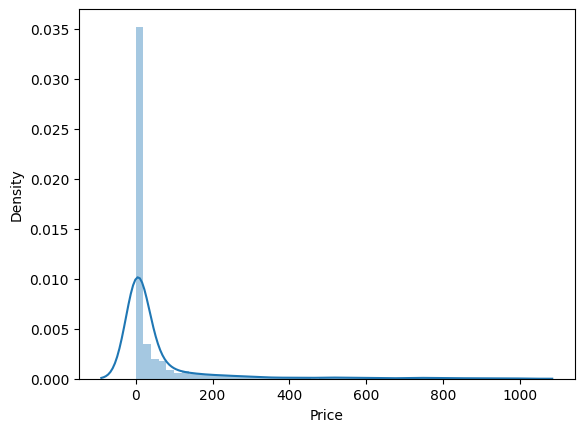

In [7]:
sns.distplot(master[master["Price"] < 1000]["Price"])

In [8]:
master.isna().sum()

Material Code     0
MAT_GROUP_DESC    0
BASIC_UNITS       0
Price             0
Min               0
Max               0
dtype: int64

# Consumptions

In [9]:
consumptions = pd.read_csv("Consumptions.csv", delimiter=";", decimal=",")
consumptions.head()

,Material Code,CONSUMPTION_DATE,CONSUMPTION_QTY
0,380,16/5/2001,0.02
1,380,24/9/2002,0.05
2,480,21/7/2003,0.05
3,480,22/7/2003,0.05
4,480,31/10/2003,0.05


In [10]:
consumptions.shape

(109622, 3)

In [11]:
consumptions["CONSUMPTION_DATE"] = pd.to_datetime(consumptions["CONSUMPTION_DATE"], dayfirst=True)

In [13]:
consumptions.head()

,Material Code,CONSUMPTION_DATE,CONSUMPTION_QTY
0,380,2001-05-16,0.02
1,380,2002-09-24,0.05
2,480,2003-07-21,0.05
3,480,2003-07-22,0.05
4,480,2003-10-31,0.05


<Axes: xlabel='CONSUMPTION_QTY', ylabel='Density'>

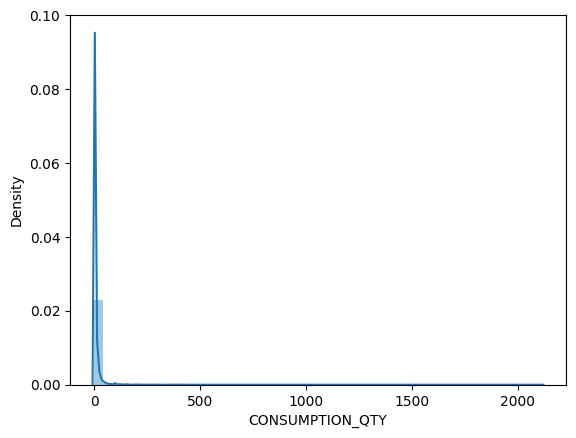

In [16]:
sns.distplot(consumptions["CONSUMPTION_QTY"])

In [17]:
consumptions.isna().sum()

Material Code       0
CONSUMPTION_DATE    0
CONSUMPTION_QTY     0
dtype: int64

# Orders

In [19]:
orders = pd.read_csv("orders.csv", delimiter=";", decimal=",")
orders.head()

,Material Code,SupplierType,PR_CREATION_DATE,PO_CREATION_DATE,PO_ACTDELIVERY_DATE,Quantity
0,2207,Domestic,28/6/2001,3/8/2001,6/8/2001,96.00
1,855,Foreign,16/2/2001,27/3/2001,30/10/2001,102.27
2,2195,Domestic,26/11/2001,31/1/2002,6/2/2002,125.00
3,7286,Foreign,19/10/2001,14/12/2001,22/2/2002,78.00
4,1023,Domestic,4/12/2001,15/1/2002,12/3/2002,50.00


In [20]:
orders["PR_CREATION_DATE"] = pd.to_datetime(orders["PR_CREATION_DATE"], dayfirst=True)
orders["PO_CREATION_DATE"] = pd.to_datetime(orders["PO_CREATION_DATE"], dayfirst=True)
orders["PO_ACTDELIVERY_DATE"] = pd.to_datetime(orders["PO_ACTDELIVERY_DATE"], dayfirst=True)

In [21]:
orders["SupplierType"].value_counts()

Domestic    22531
Foreign      3393
Name: SupplierType, dtype: int64

In [22]:
orders.isna().sum()

Material Code          0
SupplierType           0
PR_CREATION_DATE       0
PO_CREATION_DATE       0
PO_ACTDELIVERY_DATE    0
Quantity               0
dtype: int64

# Consumptions FE

In [23]:
consumptions.head()

,Material Code,CONSUMPTION_DATE,CONSUMPTION_QTY
0,380,2001-05-16,0.02
1,380,2002-09-24,0.05
2,480,2003-07-21,0.05
3,480,2003-07-22,0.05
4,480,2003-10-31,0.05


In [24]:
grouped_df = consumptions.groupby("Material Code")
consumables_KPI = pd.DataFrame(index=grouped_df["Material Code"].unique().index)

In [25]:
consumables_KPI.head()

""
Material Code
1
7
8
9
12


In [26]:
consumables_KPI["number_of_consumptions"] = grouped_df.apply(len)
consumables_KPI.head()

,number_of_consumptions
Material Code,
1,17
7,6
8,3
9,23
12,8


In [27]:
consumables_KPI["total_consumption_qty"] = grouped_df["CONSUMPTION_QTY"].sum()
consumables_KPI.head()

,number_of_consumptions,total_consumption_qty
Material Code,,
1,17,20.0
7,6,6.0
8,3,4.0
9,23,28.0
12,8,12.0


In [28]:
consumables_KPI["std_qty"] = grouped_df["CONSUMPTION_QTY"].std()
consumables_KPI.head()

,number_of_consumptions,total_consumption_qty,std_qty
Material Code,,,
1,17,20.0,0.392953
7,6,6.0,0.000000
8,3,4.0,0.577350
9,23,28.0,0.671262
12,8,12.0,1.414214


In [29]:
ref_date = pd.to_datetime('9/6/2023')

In [30]:
consumables_KPI["years_since_first_consumption"] = grouped_df["CONSUMPTION_DATE"].apply(lambda x: ((ref_date - min(x))/ 365).days)
consumables_KPI.head()

,number_of_consumptions,total_consumption_qty,std_qty,years_since_first_consumption
Material Code,,,,
1,17,20.0,0.392953,21
7,6,6.0,0.000000,19
8,3,4.0,0.577350,17
9,23,28.0,0.671262,22
12,8,12.0,1.414214,21


In [31]:
consumables_KPI["years_since_last_consumption"] = grouped_df["CONSUMPTION_DATE"].apply(lambda x: ((ref_date - max(x))/ 365).days)
consumables_KPI.head()

,number_of_consumptions,total_consumption_qty,std_qty,years_since_first_consumption,years_since_last_consumption
Material Code,,,,,
1,17,20.0,0.392953,21,6
7,6,6.0,0.000000,19,5
8,3,4.0,0.577350,17,9
9,23,28.0,0.671262,22,5
12,8,12.0,1.414214,21,6


In [32]:
consumables_KPI["average_consumption_per_year"] = consumables_KPI["total_consumption_qty"] / (consumables_KPI["years_since_first_consumption"] - consumables_KPI["years_since_last_consumption"] + 0.001)

In [33]:
consumables_KPI.head()

,number_of_consumptions,total_consumption_qty,std_qty,years_since_first_consumption,years_since_last_consumption,average_consumption_per_year
Material Code,,,,,,
1,17,20.0,0.392953,21,6,1.333244
7,6,6.0,0.000000,19,5,0.428541
8,3,4.0,0.577350,17,9,0.499938
9,23,28.0,0.671262,22,5,1.646962
12,8,12.0,1.414214,21,6,0.799947


In [34]:
consumables_KPI.isna().sum()

number_of_consumptions           0
total_consumption_qty            0
std_qty                          0
years_since_first_consumption    0
years_since_last_consumption     0
average_consumption_per_year     0
dtype: int64

# Orders FE

In [35]:
orders.head()

,Material Code,SupplierType,PR_CREATION_DATE,PO_CREATION_DATE,PO_ACTDELIVERY_DATE,Quantity
0,2207,Domestic,2001-06-28,2001-08-03,2001-08-06,96.00
1,855,Foreign,2001-02-16,2001-03-27,2001-10-30,102.27
2,2195,Domestic,2001-11-26,2002-01-31,2002-02-06,125.00
3,7286,Foreign,2001-10-19,2001-12-14,2002-02-22,78.00
4,1023,Domestic,2001-12-04,2002-01-15,2002-03-12,50.00


In [37]:
grouped_df = orders.groupby("Material Code")
orders_KPI = pd.DataFrame(index=grouped_df["Material Code"].unique().index)

In [38]:
orders_KPI.head()

""
Material Code
1
7
8
9
12


In [39]:
orders_KPI["number_of_orders"] = grouped_df.apply(len)
orders_KPI.head()

,number_of_orders
Material Code,
1,11
7,6
8,2
9,11
12,4


In [40]:
orders_KPI["perc_orders_domestic_supplier"] = grouped_df["SupplierType"].apply(lambda x: len([e for e in x if e == "Domestic"])) / orders_KPI["number_of_orders"]

In [41]:
orders_KPI.head()

,number_of_orders,perc_orders_domestic_supplier
Material Code,,
1,11,1.0
7,6,1.0
8,2,1.0
9,11,1.0
12,4,1.0


# Masters FE

In [43]:
master.head()

,Material Code,MAT_GROUP_DESC,BASIC_UNITS,Price,Min,Max
0,572,Bearings & housing,PC,10.148550,1.0,2.0
1,312,Bearings & housing,PC,38.280000,1.0,2.0
2,1526,Batteries,PC,0.318874,10.0,30.0
3,2207,Joining / welding materials,PC,0.024116,60.0,120.0
4,467,Joining / welding materials,PC,16.530000,49.0,64.0


In [44]:
master["BASIC_UNITS"].value_counts()

PC     2681
M       177
KG       55
M2       30
SET       9
L         1
Name: BASIC_UNITS, dtype: int64

In [45]:
master_tmp = master.drop("MAT_GROUP_DESC", axis=1)

In [46]:
master_KPI = pd.get_dummies(master_tmp, columns=["BASIC_UNITS"])
master_KPI.head()

,Material Code,Price,Min,Max,BASIC_UNITS_KG,BASIC_UNITS_L,BASIC_UNITS_M,BASIC_UNITS_M2,BASIC_UNITS_PC,BASIC_UNITS_SET
0,572,10.148550,1.0,2.0,0,0,0,0,1,0
1,312,38.280000,1.0,2.0,0,0,0,0,1,0
2,1526,0.318874,10.0,30.0,0,0,0,0,1,0
3,2207,0.024116,60.0,120.0,0,0,0,0,1,0
4,467,16.530000,49.0,64.0,0,0,0,0,1,0


# Merge

In [47]:
mer = pd.merge(left=consumables_KPI, right=master_KPI , on="Material Code")
KPI = pd.merge(left=orders_KPI, right=mer, on="Material Code")
KPI.head()

,Material Code,number_of_orders,perc_orders_domestic_supplier,number_of_consumptions,total_consumption_qty,std_qty,years_since_first_consumption,years_since_last_consumption,average_consumption_per_year,Price,Min,Max,BASIC_UNITS_KG,BASIC_UNITS_L,BASIC_UNITS_M,BASIC_UNITS_M2,BASIC_UNITS_PC,BASIC_UNITS_SET
0,1,11,1.0,17,20.0,0.392953,21,6,1.333244,5286.8160,1.0,2.0,0,0,0,0,1,0
1,7,6,1.0,6,6.0,0.000000,19,5,0.428541,2457.3150,1.0,1.0,0,0,0,0,1,0
2,8,2,1.0,3,4.0,0.577350,17,9,0.499938,2230.6800,2.0,2.0,0,0,0,0,1,0
3,9,11,1.0,23,28.0,0.671262,22,5,1.646962,2218.5000,2.0,2.0,0,0,0,0,1,0
4,12,4,1.0,8,12.0,1.414214,21,6,0.799947,1552.2627,1.0,2.0,0,0,0,0,1,0


# Clustering

In [48]:
from sklearn.preprocessing import MinMaxScaler

codes = KPI["Material Code"]

mms = MinMaxScaler()
x_train = mms.fit_transform(KPI.drop("Material Code", axis=1).values)

In [49]:
x_train.shape

(2953, 17)

In [50]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

In [51]:
sils = []

for k in range(2, 20):
    km = KMeans(n_clusters=k)
    km.fit(x_train)

    sils.append(silhouette_score(x_train, km.labels_))

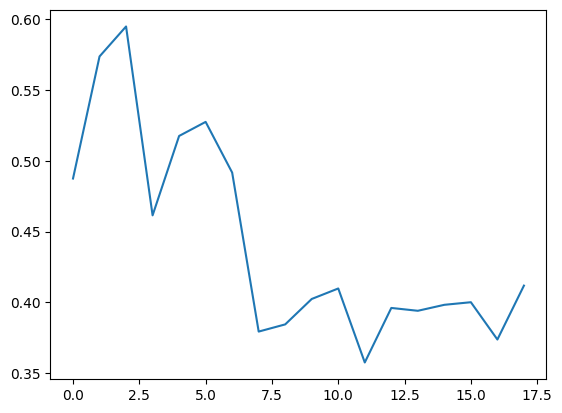

In [52]:
plt.plot(sils)

In [53]:
km = KMeans(n_clusters=5)
km.fit(x_train)

KMeans(n_clusters=5)

In [54]:
indexes = {}

for clust in range(5):
    indexes[clust] = np.where(km.labels_ == clust)[0]

In [55]:
indexes

{0: array([  33,   35,   37,   38,   42,   51,   54,   61,   62,   63,   64,
          70,   71,   74,   75,   82,   85,   93,   94,   96,   97,  102,
         103,  104,  110,  111,  124,  126,  127,  133,  135,  156,  158,
         159,  168,  181,  185,  189,  200,  202,  205,  208,  212,  215,
         217,  223,  226,  239,  281,  286,  292,  309,  318,  340,  344,
         371,  375,  392,  399,  400,  420,  428,  436,  447,  458,  469,
         491,  500,  518,  532,  538,  542,  545,  561,  588,  605,  638,
         649,  673,  682,  688,  689,  701,  703,  707,  712,  726,  736,
         753,  769,  800,  803,  810,  813,  831,  857,  863,  864,  869,
         883,  891,  898,  903,  954,  958,  974,  977,  998, 1018, 1028,
        1073, 1132, 1158, 1199, 1287, 1389, 1390, 1394, 1395, 1396, 1397,
        1399, 1401, 1406, 1410, 1411, 1413, 1414, 1416, 1418, 1419, 1424,
        1425, 1426, 1427, 1428, 1431, 1432, 1435, 1436, 1437, 1440, 1441,
        1444, 1445, 1452, 1453, 145

In [56]:
for i in range(5):
    print(master[master["Material Code"].isin(codes[indexes[i]])]["MAT_GROUP_DESC"].value_counts())
    print("---------------------------------------------------------------------------")

Liners                                          102
Cast / welded steel parts                        72
Low /high  pressure air systems                  41
Sealing materials                                40
Conveyor belts & parts                           34
Filling unit & unloading unit                    33
Bearings & housing                               30
Ducting systems                                  27
Very low voltage materials & control systems     27
Joining / welding materials                      26
Power transmission                               23
Hydraulic control & network                      19
Low voltage mat.                                 19
Screw, plate / bucket conveyors & parts          16
Chains & hoisting / lifting supplies             12
Non steel materials                              10
Air transportation & parts                        6
Car parts & tyres                                 6
Impact casts                                      4
High tempera